In [57]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as si
import os
import scipy.stats as stats

cwd = os.getcwd()
plots = os.path.join(cwd,'plots')




def transform_rotation(theta, gamma):
    tan_gamma = np.tan(gamma/180*np.pi)
    true_tan_alhpa = tan_gamma * np.cos(theta/180*np.pi)
    true_tan_beta = - tan_gamma * np.sin(theta/180*np.pi)
    return true_tan_alhpa, true_tan_beta

def stepper_to_angle(stepper):
    return stepper/16*0.9

data = {}
data_baffled = {}
colors = {}
angles = [45, 90, 135, 180]
for angle in angles:
    for run in [1, 2, 3]:
        f = os.path.join(cwd, 'data', f'{angle}_noalbedo{run}_max70')
        data[(angle, run)] = np.loadtxt(f, skiprows=1, delimiter=',',).T
        f_baffled = os.path.join(cwd, 'data', f'{angle}_noalbedo{run}_baffled_max70')
        data_baffled[(angle, run)] = np.loadtxt(f_baffled, skiprows=1, delimiter=',').T
        colors[(angle, run)] = plt.cm.hsv((angle-60+15*(run))/135)

### Check zero position angles

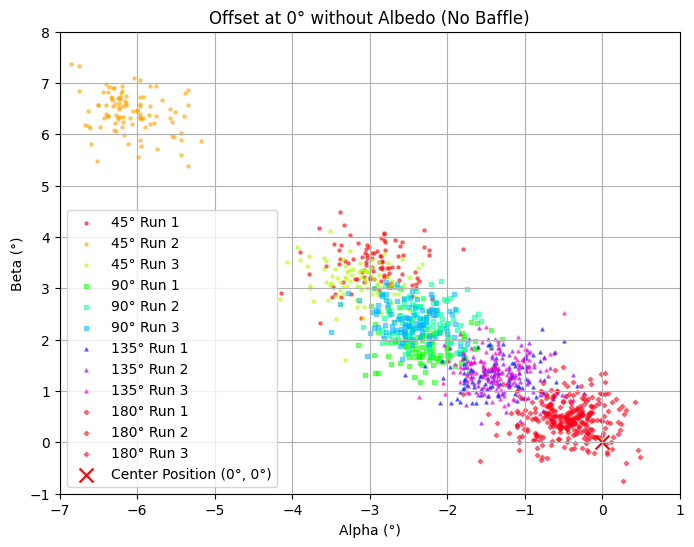

Average offset without baffle: Alpha = -2.05°, Beta = 2.08°


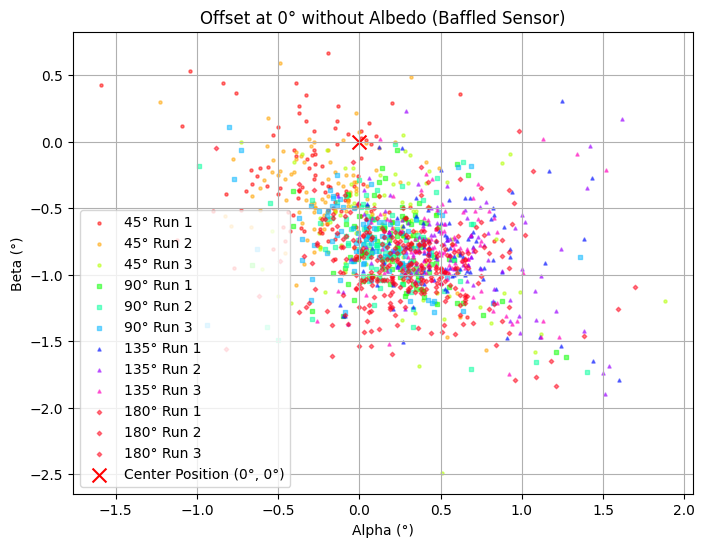

Average offset with baffle: Alpha = 0.23°, Beta = -0.75°


In [58]:
plt.figure(figsize=(8, 6))
zeroing = {}
for key in data:
    angle, run = key
    mask = data[key][1] == 0
    avg_alpha = np.mean(data[key][9][mask])
    avg_beta = np.mean(data[key][10][mask])
    zeroing[key] = (avg_alpha, avg_beta)
    symbol = 'o' if angle == 45 else 's' if angle == 90 else '^' if angle == 135 else 'D'
    plt.scatter(data[key][9][mask], data[key][10][mask], label=f'{angle}° Run {run}', alpha=0.5, s=5, marker=symbol, color=colors[key])
    # plt.scatter(data[key][9][mask], data[key][10][mask], label=f'{angle}° Run {run}', alpha=0.5, s=5, marker=symbol)
plt.xlabel('Alpha (°)')
plt.ylabel('Beta (°)')
plt.title('Offset at 0° without Albedo (No Baffle)')
plt.grid()
plt.xlim(-7, 1)
plt.ylim(-1, 8)
plt.scatter(0, 0, color='red', marker='x', s=100, label='Center Position (0°, 0°)')
plt.legend()
plt.savefig(os.path.join(plots, 'offset_at_0_nobaffle.png'), dpi=300)
plt.show()

#average offsets
avg_alpha = np.mean([zeroing[key][0] for key in zeroing])
avg_beta = np.mean([zeroing[key][1] for key in zeroing])
print(f'Average offset without baffle: Alpha = {avg_alpha:.2f}°, Beta = {avg_beta:.2f}°')

plt.figure(figsize=(8, 6))
zeroing_baffled = {}
for key in data_baffled:
    angle, run = key
    mask = data_baffled[key][1] == 0
    avg_alpha = np.mean(data_baffled[key][9][mask])
    avg_beta = np.mean(data_baffled[key][10][mask])
    zeroing_baffled[key] = (avg_alpha, avg_beta)
    symbol = 'o' if angle == 45 else 's' if angle == 90 else '^' if angle == 135 else 'D'
    plt.scatter(data_baffled[key][9][mask], data_baffled[key][10][mask], label=f'{angle}° Run {run}', alpha=0.5, s=5, marker=symbol, color=colors[key])
    # plt.scatter(data[key][9][mask], data[key][10][mask], label=f'{angle}° Run {run}', alpha=0.5, s=5, marker=symbol)
plt.xlabel('Alpha (°)')
plt.ylabel('Beta (°)')
plt.title('Offset at 0° without Albedo (Baffled Sensor)')
plt.grid()
# plt.xlim(-1, 4)
# plt.ylim(-1, 8)
plt.scatter(0, 0, color='red', marker='x', s=100, label='Center Position (0°, 0°)')
plt.legend()
plt.savefig(os.path.join(plots, 'offset_at_0_baffle.png'), dpi=300)
plt.show()

#average offsets
avg_alpha_baffled = np.mean([zeroing_baffled[key][0] for key in zeroing_baffled])
avg_beta_baffled = np.mean([zeroing_baffled[key][1] for key in zeroing_baffled])
print(f'Average offset with baffle: Alpha = {avg_alpha_baffled:.2f}°, Beta = {avg_beta_baffled:.2f}°')

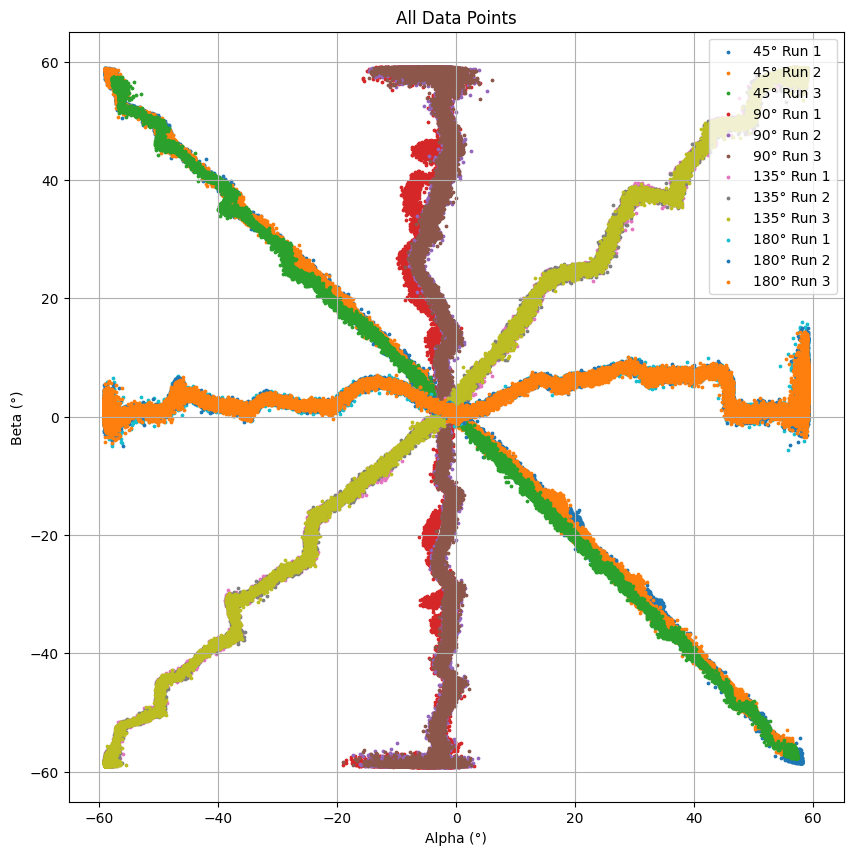

In [59]:
plt.figure(figsize=(10, 10))
for key in data:
    angle, run = key
    d = data[key]
    
    plt.scatter(d[9], d[10], label=f'{angle}° Run {run}', alpha=1, s=3)
plt.xlabel('Alpha (°)')
plt.ylabel('Beta (°)')
plt.title('All Data Points')
plt.legend(loc='upper right')
plt.grid()
plt.savefig(os.path.join(plots, 'all_data_points.png'), dpi=300)
plt.show()

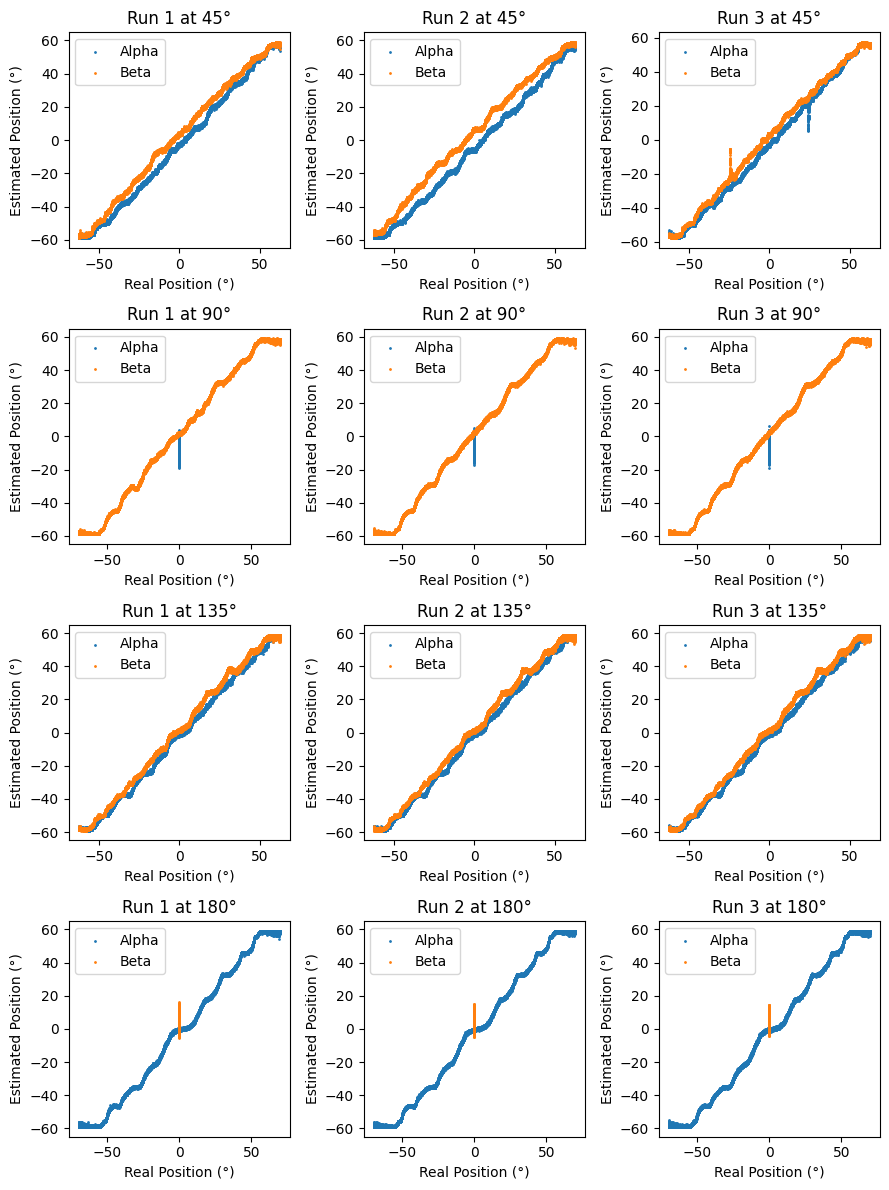

In [60]:
plt.figure(figsize=(9, 12))
fig = 1
for key in data:
    theta, run = key
    plt.subplot(4, 3, fig)
    d = data[key]
    true_tan_alpha, true_tan_beta = transform_rotation(theta, stepper_to_angle(d[1]))
    plt.scatter(np.arctan(true_tan_alpha)*180/np.pi, d[9], s = 1, label='Alpha')
    plt.scatter(np.arctan(true_tan_beta)*180/np.pi, d[10], s = 1, label='Beta')
    plt.legend(loc='upper left')
    plt.xlabel('Real Position (°)')
    plt.ylabel('Estimated Position (°)')
    plt.title(f'Run {run} at {theta}°')
    fig += 1
plt.tight_layout()
plt.savefig(os.path.join(plots, 'run_plots.png'), dpi=300)
plt.show()
    

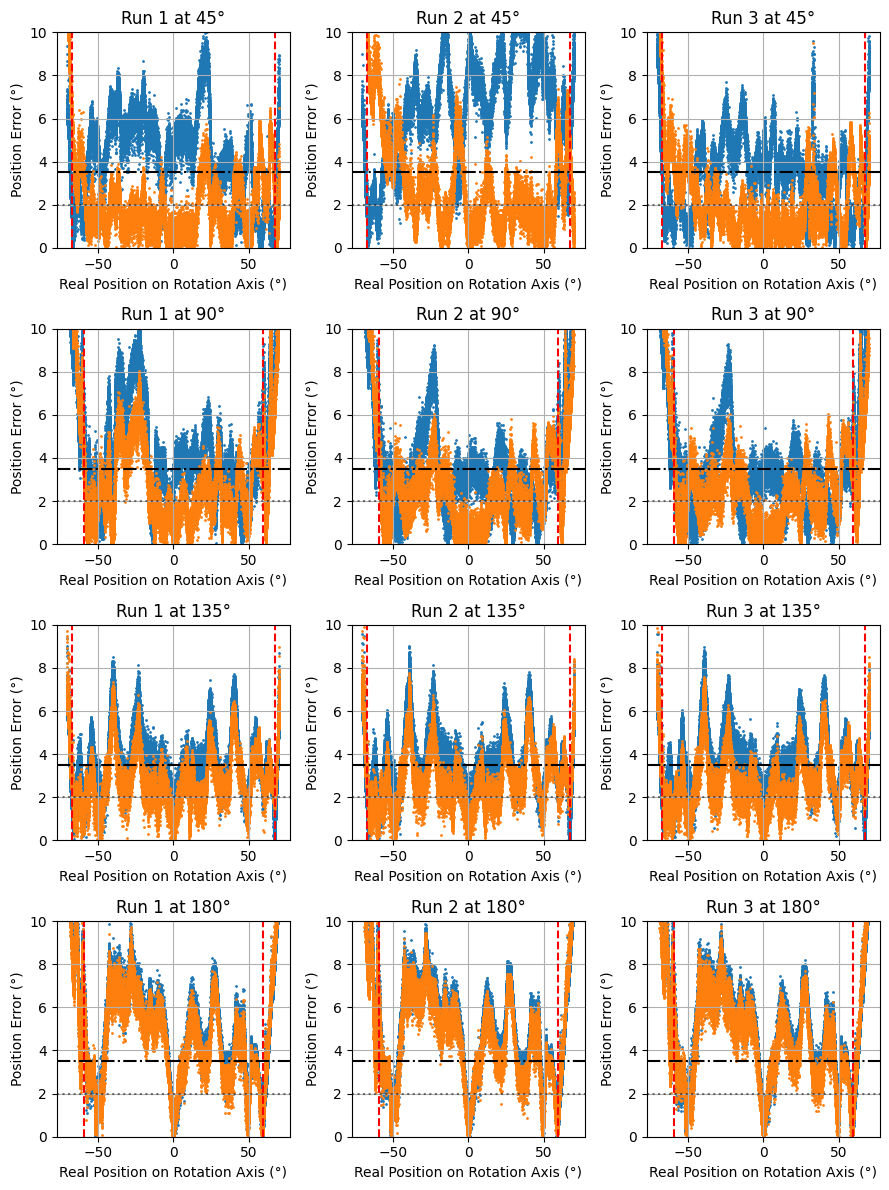

In [61]:
plt.figure(figsize=(9, 12))
fig = 1
for key in data:
    theta, run = key
    plt.subplot(4, 3, fig)
    d = data[key]
    true_tan_alpha, true_tan_beta = transform_rotation(theta, stepper_to_angle(d[1]))
    zeroing_alpha, zeroing_beta = zeroing[key]
    position_error = np.sqrt((d[9] - np.arctan(true_tan_alpha)*180/np.pi)**2 + (d[10] - np.arctan(true_tan_beta)*180/np.pi)**2)
    zeroed_position_error = np.sqrt((d[9] - zeroing_alpha - np.arctan(true_tan_alpha)*180/np.pi)**2 + (d[10] - zeroing_beta - np.arctan(true_tan_beta)*180/np.pi)**2)
    plt.scatter(stepper_to_angle(d[1]), position_error, s = 1, label='Position Error')
    plt.scatter(stepper_to_angle(d[1]), zeroed_position_error, s = 1, label='Zeroed Error')
    plt.xlabel('Real Position on Rotation Axis (°)')
    plt.ylabel('Position Error (°)')
    plt.title(f'Run {run} at {theta}°')
    
    
    plt.axhline(2, color='black', linestyle=':', alpha=0.5, label='2° error')
    plt.axhline(3.5, color='black', linestyle='-.', label='3.5° error')
    lim = 59.2 if theta % 90 == 0 else 67.1
    plt.axvline(lim, color='red', linestyle='--', label=f'{lim}° limit')
    plt.axvline(-lim, color='red', linestyle='--')
    # plt.legend(loc='upper right')
    plt.grid()
    plt.ylim(0, 10)
    
    fig += 1
plt.tight_layout()
plt.savefig(os.path.join(plots, 'run_plots.png'), dpi=300)
plt.show()

    

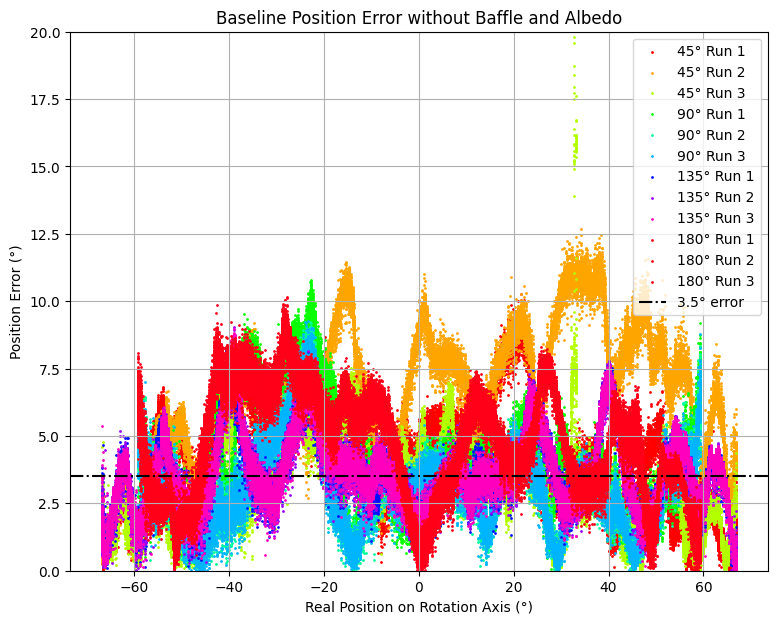

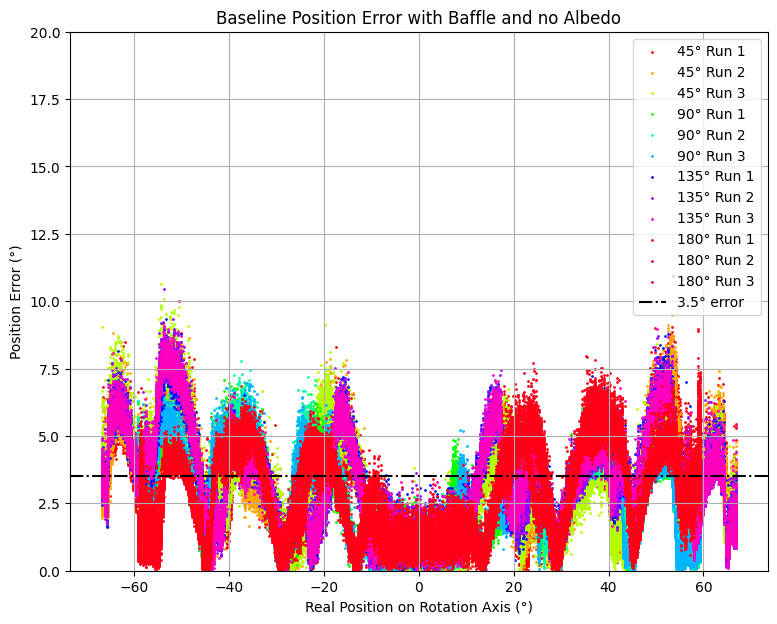

In [74]:
plt.figure(figsize=(9, 7))

position_errors = []
for key in data:
    theta, run = key
    d = data[key]
    limit = 59.2 if theta % 90 == 0 else 67.1
    mask = (stepper_to_angle(d[1]) < limit) & (stepper_to_angle(d[1]) > -limit)
    true_tan_alpha, true_tan_beta = transform_rotation(theta, stepper_to_angle(d[1]))
    position_error = np.sqrt((d[9] - np.arctan(true_tan_alpha)*180/np.pi)**2 + (d[10] - np.arctan(true_tan_beta)*180/np.pi)**2)
    position_errors.append(position_error[mask])
    symbol = 'o' if theta == 45 else 's' if theta == 90 else '^' if theta == 135 else 'D'
    plt.scatter(stepper_to_angle(d[1][mask]), position_error[mask], color=colors[key], s = 1, label=f'{theta}° Run {run}')
    
plt.xlabel('Real Position on Rotation Axis (°)')
plt.ylabel('Position Error (°)')
plt.grid()
# plt.axhline(2, color='black', linestyle=':', alpha=0.5, label='2° error')
plt.axhline(3.5, color='black', linestyle='-.', label='3.5° error')
plt.legend(loc='upper right')
plt.ylim(0, 20)
plt.title('Baseline Position Error without Baffle and Albedo')

plt.savefig(os.path.join(plots, 'error_no_baffle.png'), dpi=300)
plt.show()
plt.figure(figsize=(9, 7))

position_errors_baffled = []
for key in data_baffled:
    theta, run = key
    d = data_baffled[key]
    limit = 59.2 if theta % 90 == 0 else 67.1
    mask = (stepper_to_angle(d[1]) < limit) & (stepper_to_angle(d[1]) > -limit)
    true_tan_alpha, true_tan_beta = transform_rotation(theta, stepper_to_angle(d[1]))
    position_error = np.sqrt((d[9] - np.arctan(true_tan_alpha)*180/np.pi)**2 + (d[10] - np.arctan(true_tan_beta)*180/np.pi)**2)
    position_errors_baffled.append(position_error[mask])
    symbol = 'o' if theta == 45 else 's' if theta == 90 else '^' if theta == 135 else 'D'
    plt.scatter(stepper_to_angle(d[1][mask]), position_error[mask], color=colors[key], s = 1, label=f'{theta}° Run {run}')
    
plt.xlabel('Real Position on Rotation Axis (°)')
plt.ylabel('Position Error (°)')
plt.grid()
plt.title('Baseline Position Error with Baffle and no Albedo')
# plt.axhline(2, color='black', linestyle=':', alpha=0.5, label='2° error')
plt.axhline(3.5, color='black', linestyle='-.', label='3.5° error')
plt.legend(loc='upper right')
plt.ylim(0, 20)
plt.savefig(os.path.join(plots, 'error_baffled.png'), dpi=300)
plt.show()

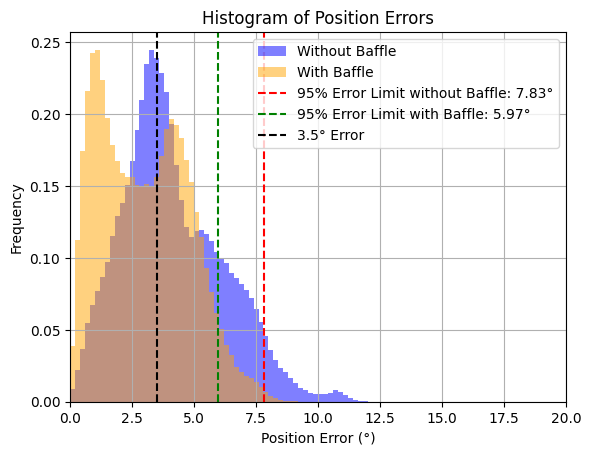

: 

In [ ]:
all_position_errors = np.concatenate(position_errors)
all_position_errors_baffled = np.concatenate(position_errors_baffled)
p_error = np.percentile(all_position_errors, 95)
p_error_baffled = np.percentile(all_position_errors_baffled, 95)
plt.hist(all_position_errors, alpha=0.5, bins=100, label='Without Baffle', color='blue', density=True, range=(0, 20))
plt.hist(all_position_errors_baffled, alpha=0.5, bins=100, label='With Baffle', color='orange', density=True, range=(0, 20))
plt.axvline(p_error, color='red', linestyle='--', label=f'95% Error Limit without Baffle: {p_error:.2f}°')
plt.axvline(p_error_baffled, color='green', linestyle='--', label=f'95% Error Limit with Baffle: {p_error_baffled:.2f}°')
plt.axvline(3.5, color='black', linestyle='--', label='3.5° Error')
plt.xlabel('Position Error (°)')
plt.ylabel('Frequency')
plt.title('Histogram of Position Errors')
plt.legend()
plt.grid()
plt.xlim(0, 20)
plt.savefig(os.path.join(plots, 'histogram_position_errors.png'), dpi=300)
plt.show()
